In [1]:
# test dataset creation functions.

In [1]:
from datasets import *

# Create precip weighted dataset

In [2]:
base_folder = "Datasets"
output_folder = "Output/"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["TEST_FRACTION"] = 0.1
description["DO_SHUFFLE"] = False
description["PRECIP_WEIGHTING"] = True


description["TIMESCALE"] = "YEARLY"

In [3]:
create_precip_weighted_dataset(description, base_folder, output_folder)

loading variables
<class 'numpy.ndarray'>
[[[255.59442937 255.79211294 256.04323453 ... 255.73234555 255.57750095
   255.44744868]
  [257.42848132 257.67195761 257.81079129 ... 257.42825099 257.0696142
   257.12159663]
  [259.63124018 261.45520849 261.81820364 ... 257.45569485 257.64225941
   258.57005659]
  ...
  [  3.65416972   3.60684598   3.67096424 ...   5.10680472   4.27090768
     3.83490616]
  [  2.90607263   2.55909791   2.40761043 ...   4.14451261   3.67233291
     3.24862759]
  [  2.47389888   2.36554042   2.26726948 ...   2.68620003   2.54943953
     2.49279515]]

 [[254.53524458 254.50213704 254.55649744 ... 254.66126037 254.60173288
   254.56945482]
  [258.10614293 258.17947051 258.25549025 ... 257.14082485 257.11623704
   257.6593984 ]
  [263.40492295 264.60228208 264.7929061  ... 260.08330095 260.89219784
   262.22960981]
  ...
  [  3.35653875   3.36168351   3.52868653 ...   5.39233257   4.28932433
     3.58708171]
  [  3.1888782    2.90338117   2.7760283  ...   4.23068

done
writing dataset description
done


In [4]:
import gzip
import pickle

In [5]:
with gzip.open("Output/dset_-0x69a7426d2797ee9b/dataset.gz", 'r') as f:
    a = pickle.load(f)

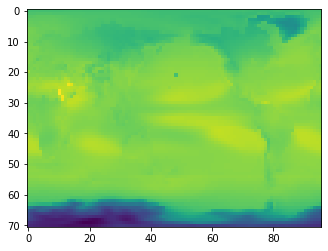

In [18]:
import matplotlib.pyplot as plt
plt.imshow(np.mean(a["train"]["targets"][:,0,...],axis=0))

In [13]:
a["train"]["predictors"].shape

(899, 2, 71, 96)

# Create yearly dataset

In [2]:
base_folder = "Datasets_old"
output_folder = "Output"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "temp", 
                                "precip"]

description["PREDICTOR_VARIABLES"] = {"temp": ["temp_1"],
                                      "precip": ["precip"]}

description["TARGET_VARIABLES"] = {"isotopes": ["dO18"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "temp", 
                                   "precip", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1, -1] # slicing array. To use no slice, use [None, None]. Otherwise sth like [1,-1]

description["TEST_FRACTION"] = 0.1
description["DO_SHUFFLE"] = False
description["PRECIP_WEIGHTING"] = False

"""
description["RESOLUTION"] = 5
description["INTERPOLATE_CORNERS"] = True
description["INTERPOLATION"] = "cons1"
"""


description["TIMESCALE"] = "YEARLY"

In [3]:
create_yearly_dataset(description, base_folder, output_folder)

loading variables
False
True
True
writing pickle
done
writing dataset description
done


In [4]:
with gzip.open("Output/dset_-0x55c035d15248163f/dataset.gz", 'r') as f:
    a = pickle.load(f)

In [11]:
(a["train"]["masks"] == True).any()

False

## Create yearly dataset - new climate model data

In [11]:
#new hadcm3
base_folder = "Datasets"
output_folder = "Output"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec",
                                   ] # "slp"

description["CLIMATE_MODEL"] = "isoGSM"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [None, None]

description["TEST_FRACTION"] = 0.1
description["DO_SHUFFLE"] = False
description["PRECIP_WEIGHTING"] = False

"""
description["RESOLUTION"] = 5
description["INTERPOLATE_CORNERS"] = True
description["INTERPOLATION"] = "cons1"
"""


description["TIMESCALE"] = "YEARLY"

In [12]:
create_yearly_dataset(description, base_folder, output_folder)

loading variables
Datasets\isoGSM\Original\isotopes_yearly.nc
Datasets\isoGSM\Original\tsurf_yearly.nc
Datasets\isoGSM\Original\prec_yearly.nc
writing pickle
done
writing dataset description
done


In [20]:
import gzip
import pickle
with gzip.open("Output/dset_0x71bc56597708c9bc/dataset.gz", 'r') as f:
    a = pickle.load(f)
    
a["train"]["predictors"].shape

(900, 2, 73, 96)

In [14]:
(np.isnan(a["train"]["targets"])).any()

True

In [15]:
import netCDF4 as nc
b = nc.Dataset("Datasets/ECHAM5/Original/isotopes_yearly.nc")
i = b.variables["d18O"]

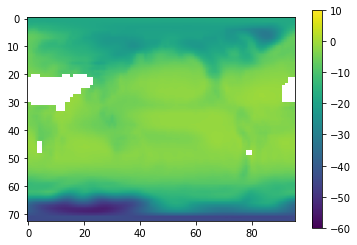

In [16]:
d = i[:].data
d[i[:].mask] = np.nan
plt.imshow(np.mean(d,axis=(0,1)),vmin=-60,vmax=10)
plt.colorbar()

In [17]:
np.amax(d[~np.isnan(d)])

7.9466662

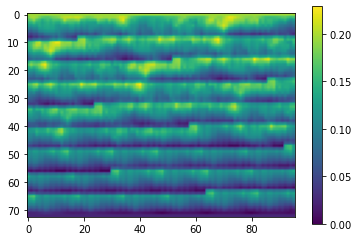

In [18]:
import matplotlib.pyplot as plt
plt.imshow(np.mean(a["train"]["predictors"][:,1,...],axis=0))
plt.colorbar()

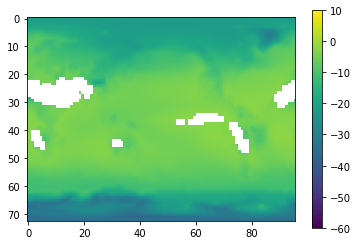

In [21]:
import matplotlib.pyplot as plt
plt.imshow(np.mean(a["train"]["targets"],axis=(0,1)),vmin=-60,vmax=10)
plt.colorbar()

In [10]:
#new other models
base_folder = "Datasets"
output_folder = "Output"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec",
                                   ] # "slp"

description["CLIMATE_MODEL"] = "ECHAM5"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [None, None]

description["TEST_FRACTION"] = 0.1
description["DO_SHUFFLE"] = False
description["PRECIP_WEIGHTING"] = False

"""
description["RESOLUTION"] = 5
description["INTERPOLATE_CORNERS"] = True
description["INTERPOLATION"] = "cons1"
"""


description["TIMESCALE"] = "YEARLY"

In [23]:
a["train"]["targets"].shape

(900, 1, 73, 96)

In [11]:
create_yearly_dataset(description, base_folder, output_folder)

loading variables
writing pickle
done
writing dataset description
done


In [24]:
d.shape

(1000, 1, 73, 96)

# Create monthly dataset

In [1]:
from datasets import *

In [2]:
base_folder = "Datasets"
output_folder = "Output"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["TEST_FRACTION"] = 0.1
description["DO_SHUFFLE"] = False

description["PRECIP_WEIGHTING"] = False

description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED"] = np.sort([0,1,2,3,4,5,6,7,8,9,10,11]).tolist()
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0,-1]).tolist()

In [ ]:
create_monthly_dataset(description, base_folder, output_folder)

loading variables
dict_keys(['d18O'])
writing pickle


In [ ]:
import netCDF4 as nc

a = nc.Dataset("Datasets/iHadCM3/Original/isotopes.nc")

In [ ]:
iso = a.variables["d18O"]

In [ ]:
iso.missing_value